# Layout Engine

The `paperviz.layout` module provides a flexible system for arranging multiple plots and text elements into clean, aligned visual layouts — perfect for publications, reports, or figure panels in papers.

It lets you compose complex layouts using a small set of building blocks, with predictable sizing and alignment that works across different aspect ratios and styles.

## Why Use the Layout Engine?

Traditional `matplotlib` subplots are convenient but often limited when:

- You want precise control over the **position and size** of each plot
- You want to **nest** plots (e.g. two stacked next to one big one)
- You need to add **shared legends**, **labels**, or **annotations**
- You want consistent spacing and alignment across all figures

`paperviz.layout` solves this with an intuitive, composable API.

## Core Concepts

### PlotBlock

A `PlotBlock` is the most fundamental unit: a plot generated by a registered plotting function.

You define:
- Which plot to render (e.g. `"multiple_std_lines"`)
- The parameters for that function
- Optional sizing like `fixed_width` or `fixed_height`

Below, we show an example of how to do this and we define three plots that we will continue using later on. It is very similar to the plotting module:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from paperviz.layout import render_layout
from paperviz.layout.blocks import PlotBlock

# Generate some dummy data
def generate_data(seed):
    np.random.seed(seed)
    x = np.arange(10) * seed
    y = np.random.rand(10) * 10 + 50
    err = np.random.rand(10) * 2
    return {"round_num": x, "unique_scores": y, "std_error": err}

data_dict = {
    "run_a": generate_data(1),
    "run_b": generate_data(2),
}

# Define plots
plot1 = PlotBlock("multiple_std_lines", fixed_width=0.3, fixed_height=0.3, kwargs={
    "data_dict": {
        "run_a": generate_data(3),
        "run_b": generate_data(4),
    },
    "x_key": "round_num",
    "y_key": "unique_scores",
    "yerr_key": "std_error",
    "label_map": {
        "run_a": "Forward KL",
        "run_b": "Reverse KL",
    },
    "legend_loc": None,  # suppress in individual plots
})

plot2 = PlotBlock("multiple_std_lines", kwargs={
    "data_dict": {
        "run_a": generate_data(5),
        "run_b": generate_data(6),
    },
    "x_key": "round_num",
    "y_key": "unique_scores",
    "yerr_key": "std_error",
    "label_map": {
        "run_a": "Forward KL",
        "run_b": "Reverse KL",
    },
    "legend_loc": None,
})

# Here we also initialize a bar chart
# Generate a different plot
data_dict = {
    "Forward": {
        "Accuracy": 4.2, "Precision": 3.5, "Recall": 2.1,
    },
    "Reverse": {
        "Accuracy": 6.0, "Precision": 5.2, "Recall": 4.8,
    },
    "Baseline": {
        "Accuracy": 5.3, "Precision": 4.8, "Recall": 3.6,
    }
}

# Style map for each metric (hatch patterns for filling)
style_map = {
    "Accuracy": '',
    "Precision": '\\',
    "Recall": 'x'  # Cross hatch pattern for Recall
}

plot3 = PlotBlock("general_bar_plot", fixed_width=0.3, kwargs={"data_dict": data_dict, "style_map": style_map, "legend_loc": None})

### Row and Col

Use `Row([...])` to arrange elements horizontally, and `Col([...])` to stack them vertically.

They can be nested and customized with spacing and fixed dimensions. By setting `fixed_width` and `fixed_width`, which are both in a range from $0$ to $1$ (fraction of total space taken), you can control how big you want plots to be relative to the figure.

We will now generate side-by-side plots using `Row`:

/home/quaedvli/miniconda3/envs/evotune/lib/python3.10/site-packages/paperviz/plots/simple_bar_plot.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


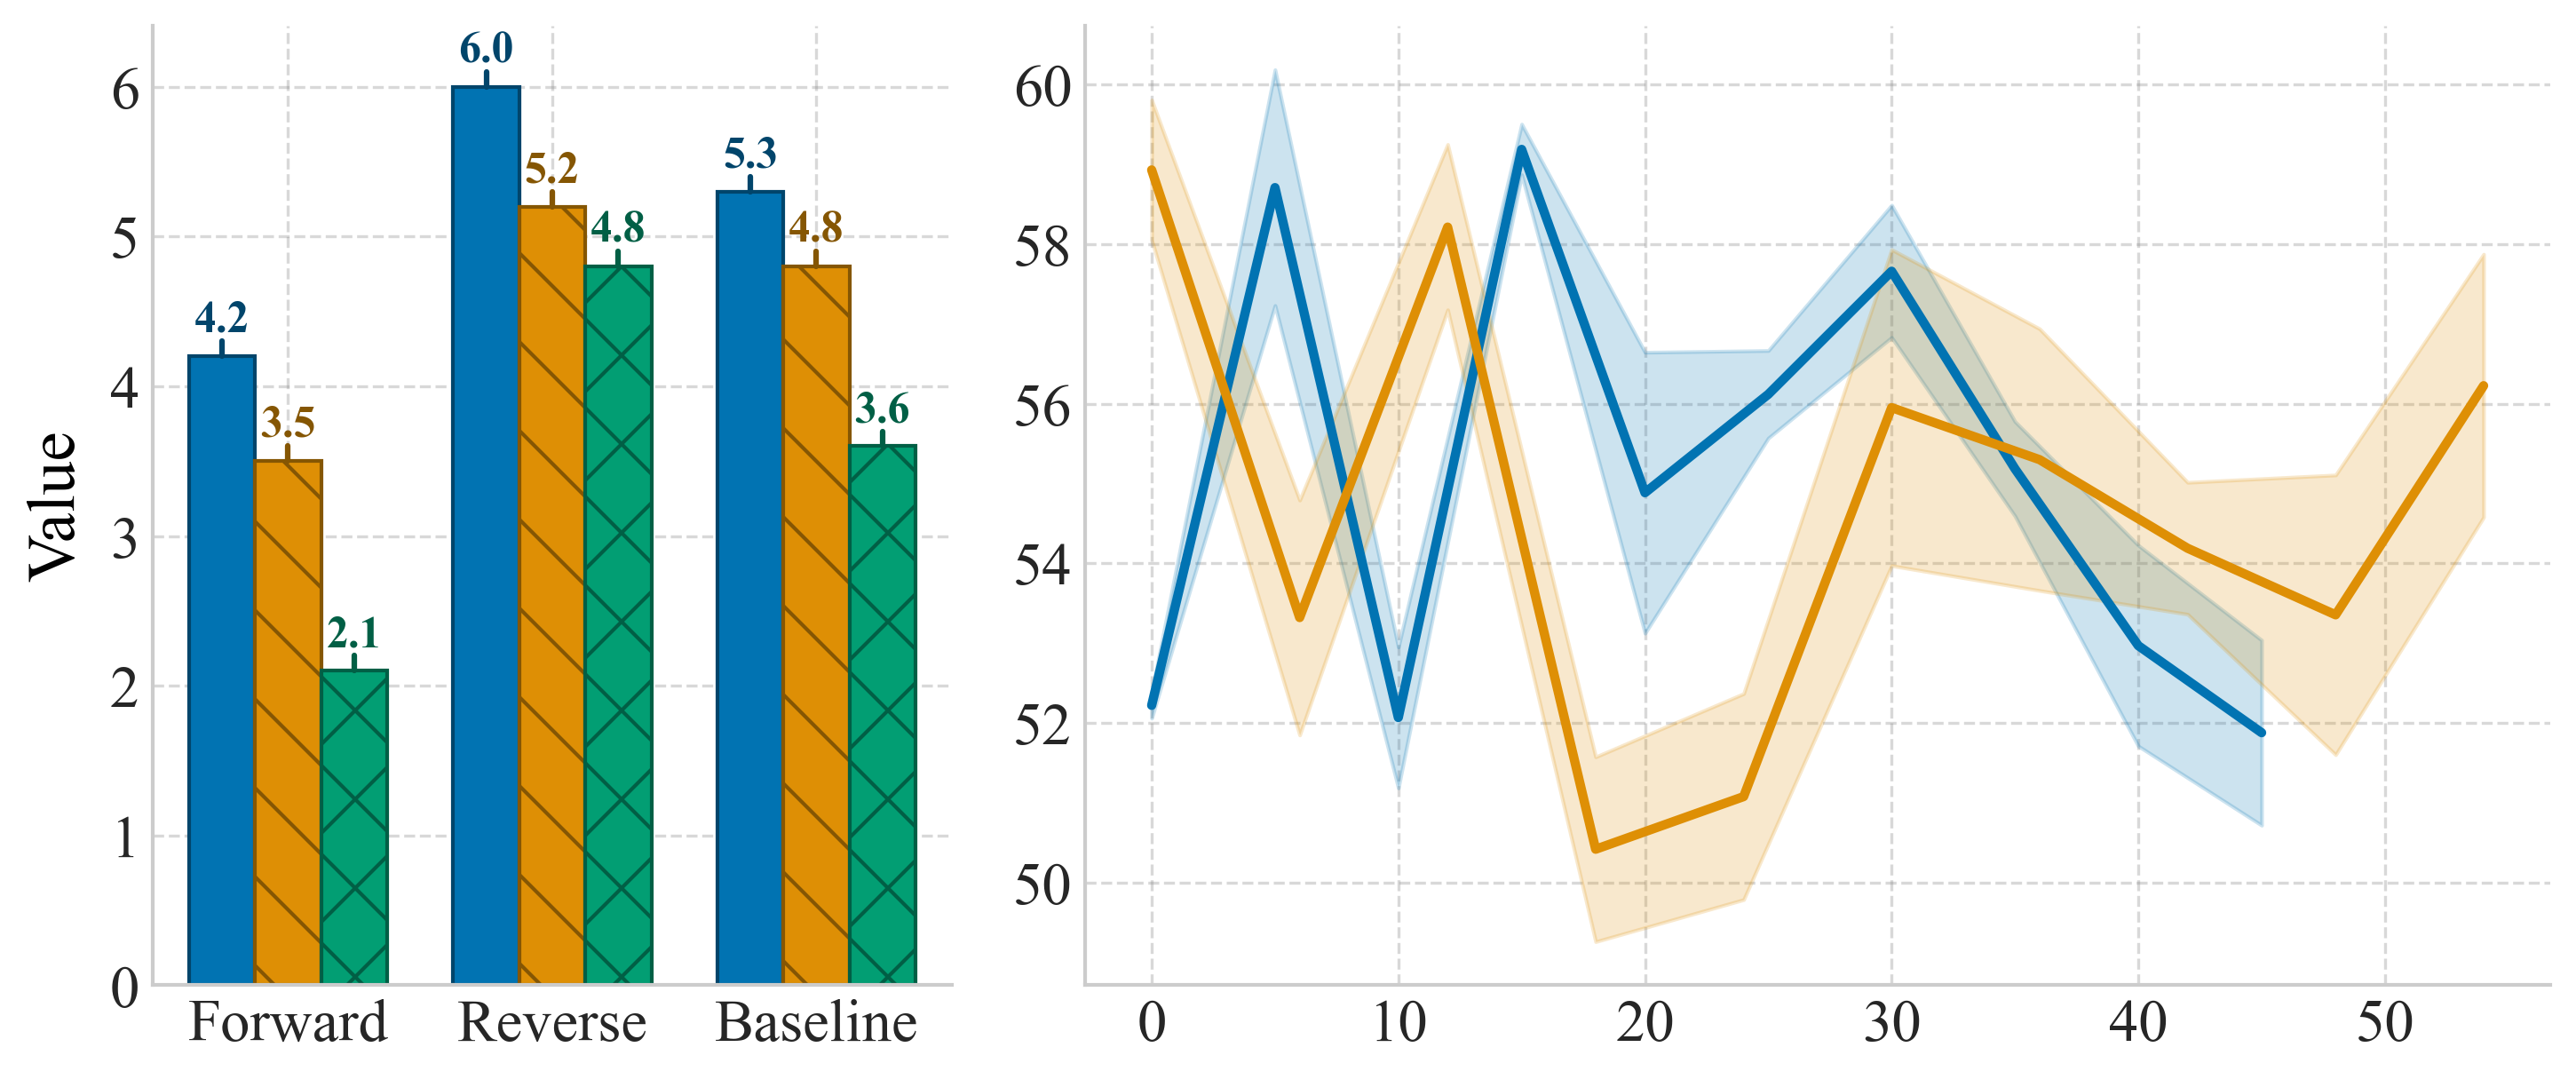

In [2]:
from paperviz.layout.blocks import Row

row_layout = Row([plot3, plot2], spacing=0.05)
fig = render_layout(row_layout, figsize=(10, 4))
plt.show()

And now let's try plots to stack them on top of each other using `Col`

/home/quaedvli/miniconda3/envs/evotune/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


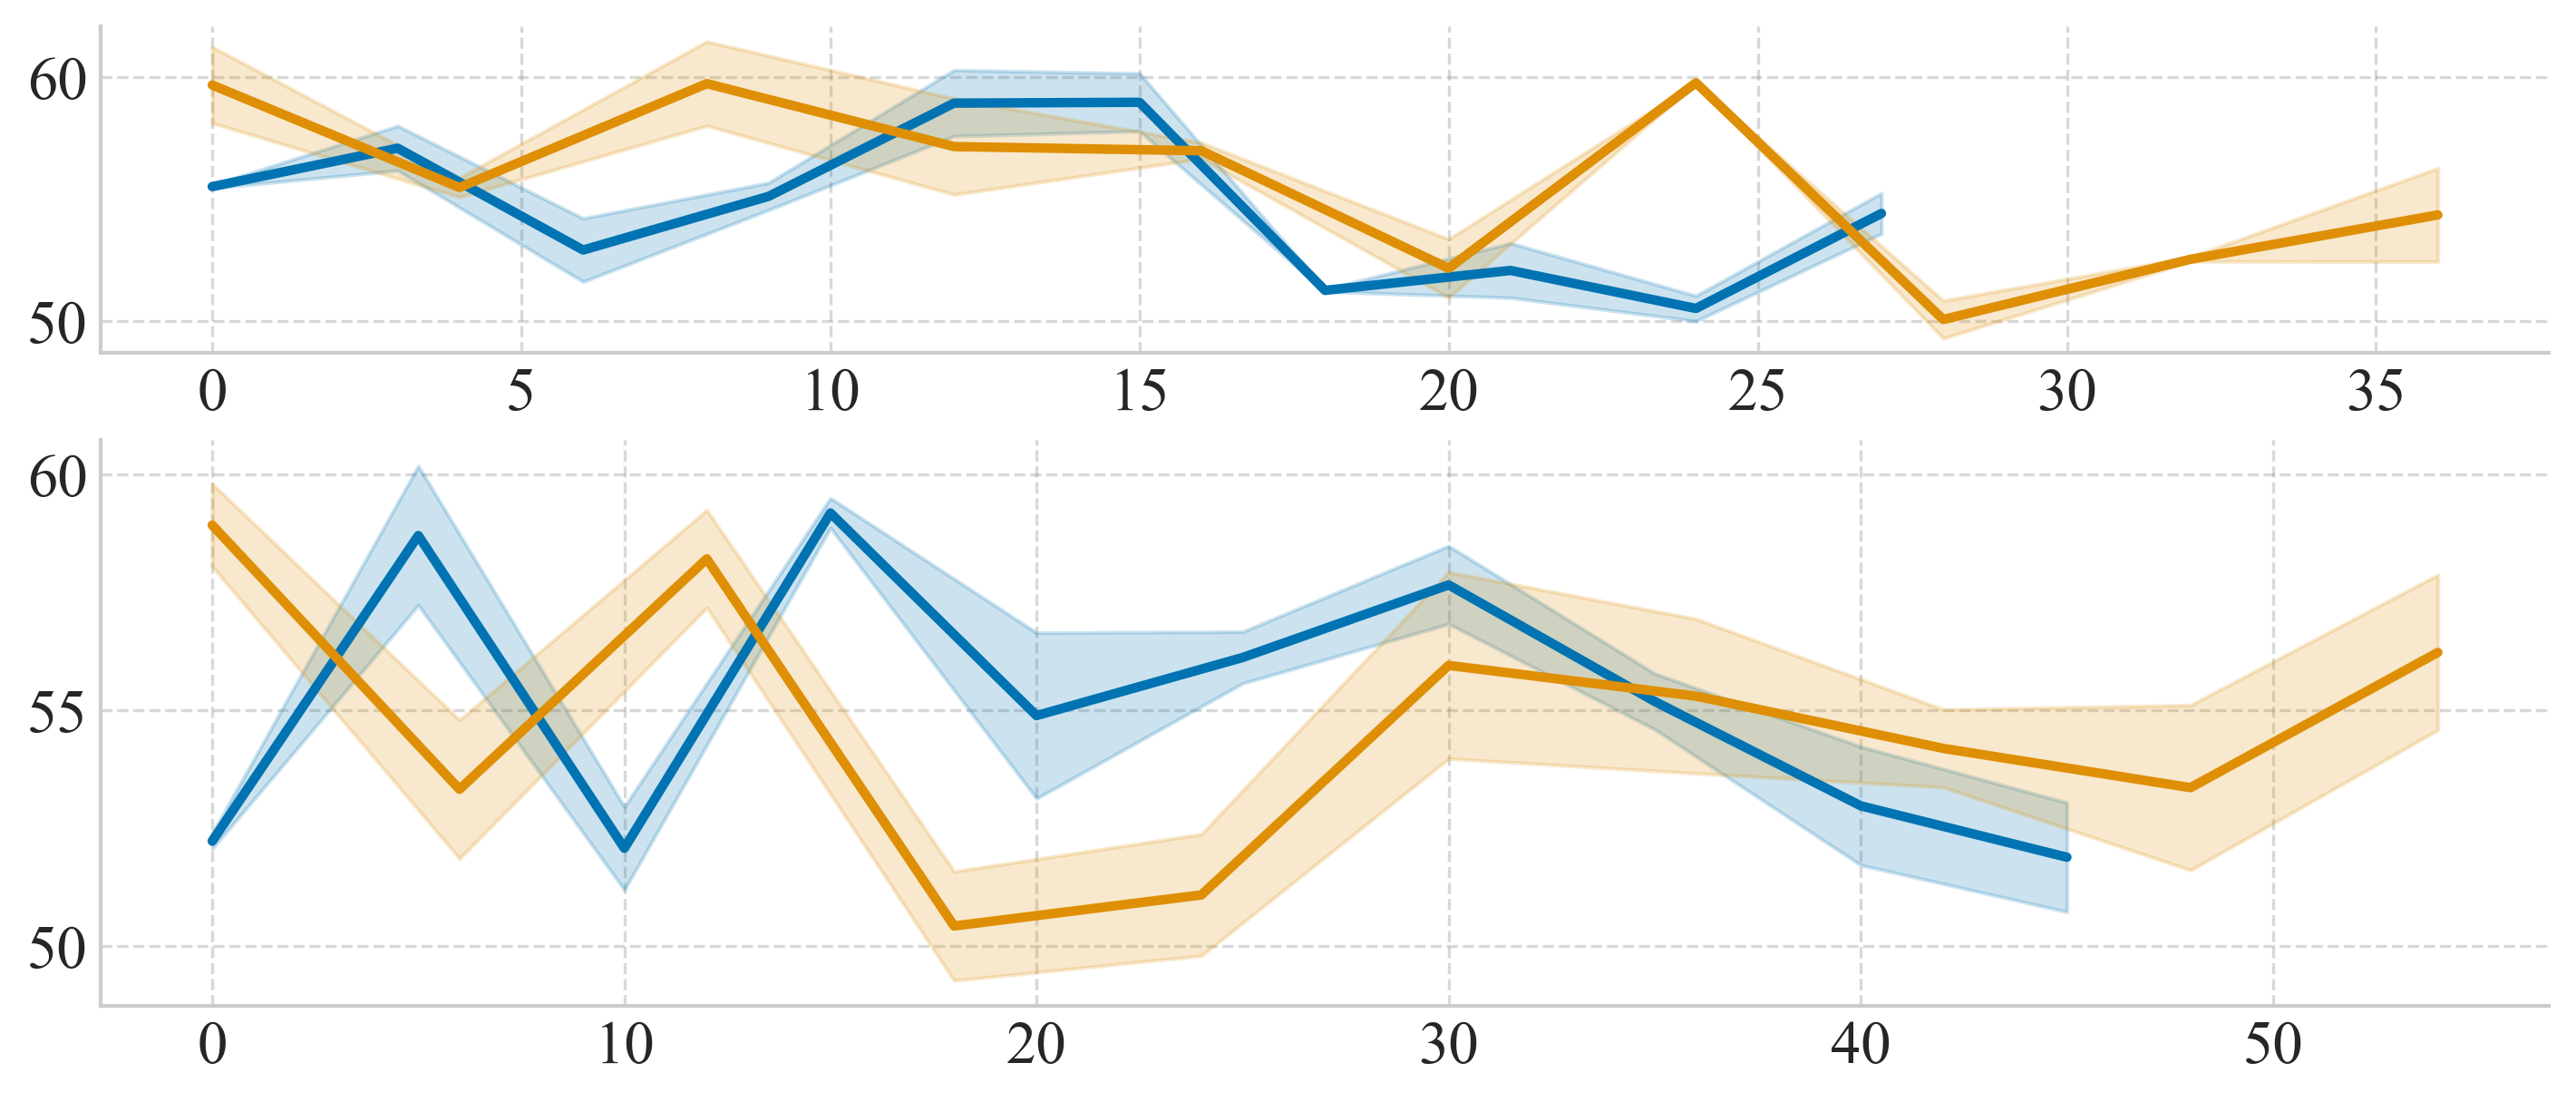

In [3]:
from paperviz.layout.blocks import Col

col_layout = Col([plot1, plot2], spacing=0.08)
fig = render_layout(col_layout, figsize=(10, 4))
plt.show()

You can even nest blocks, and make it as complex as you would like! Combine different types of plots -- whatever makes you happy!

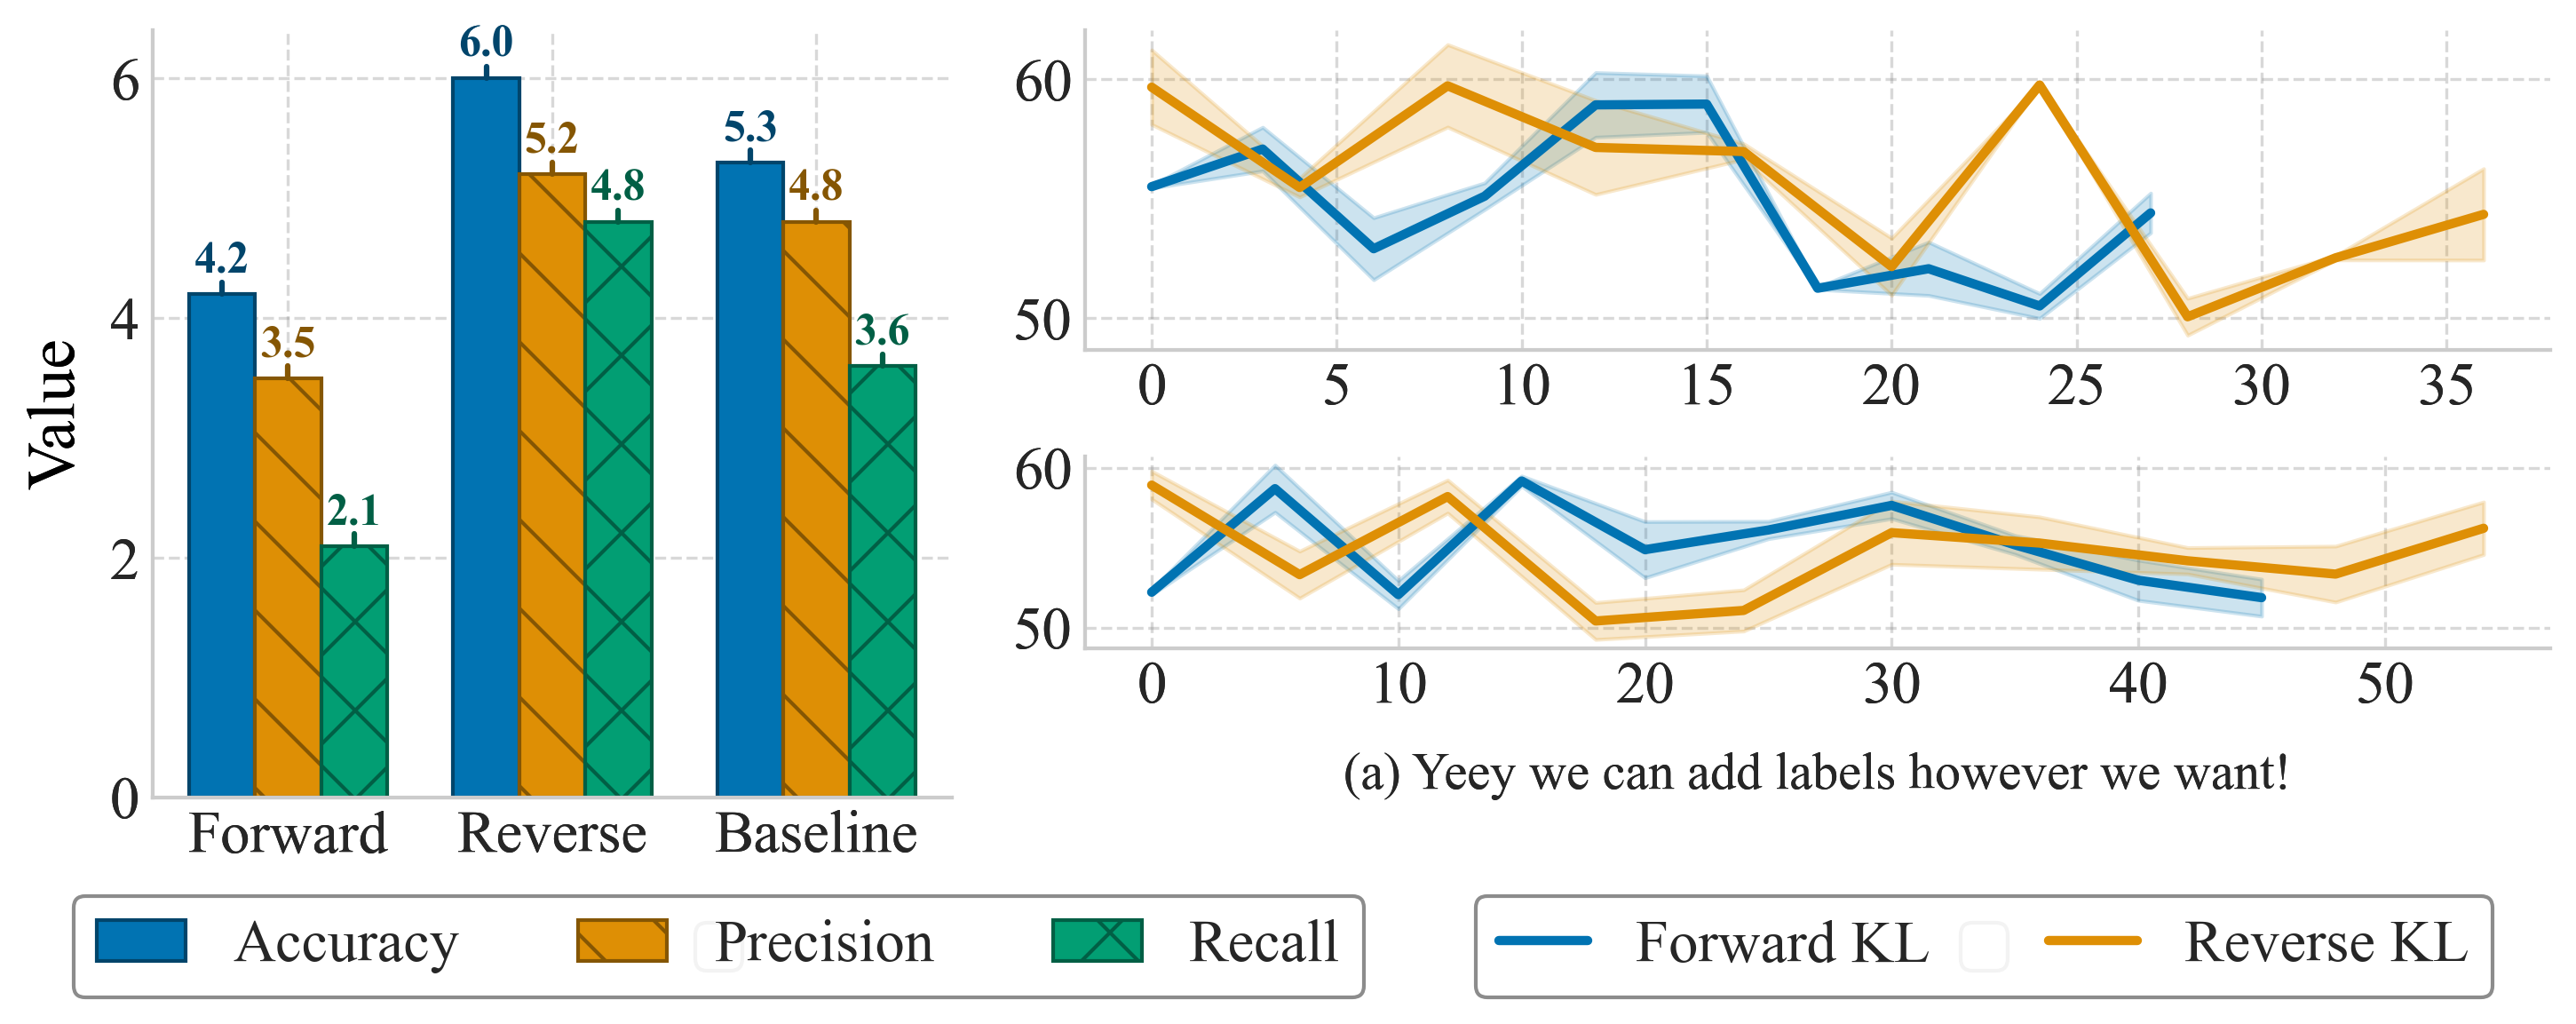

In [34]:
from paperviz.layout.blocks import LegendBlock, Label

nested_layout = Col([
    Row([
        plot3, 
        Col([plot1, plot2, Label("(a) Yeey we can add labels however we want!", fixed_height=0.04)], spacing=0.1)
    ], spacing=0.05), 
    Row([
        LegendBlock(labels=["Accuracy", "Precision", "Recall"], ncol=3),
        LegendBlock(labels=["Forward KL", "Reverse KL"], ncol=2)
    ], fixed_height=0.08)
], spacing=0.1)

fig = render_layout(nested_layout, figsize=(10, 4))
plt.show()

---

### Label

A `Label` adds a small caption or annotation. Common use cases include:

- Plot identifiers like “(a)”, “(b)”
- Brief text like axis descriptors or scenario names

You can control:
- Alignment (`left`, `center`, `right`)
- Font size and family
- Fixed height (optional)

👉 _Insert example placing a label below a plot._

---

### LegendBlock

Use `LegendBlock` to define a **global legend** that spans multiple plots. Instead of repeating the legend in every axis, you can:

- Specify the list of labels to include
- Let `paperviz` gather handles from matching plots
- Automatically merge styles and colors

This works even if the plots are on different axes.

👉 _Insert example with 2–3 plots and a single `LegendBlock` above._

> **Tip:** Make sure the label strings (e.g. "Forward KL") match across plots. Color and style are inferred from the first appearance.

---

### Spacer

Insert an invisible block between elements to fine-tune spacing when needed.

👉 _Insert example with a `Spacer(fixed_height=0.02)` between plots._

---

## Nesting Layouts

You can nest `Row` and `Col` arbitrarily, enabling layouts like:

- One large plot on the left, two smaller plots stacked on the right
- A legend spanning the top, plots below, and labels at the bottom
- Multi-panel grids with consistent spacing

👉 _Insert a progressively built example:_
- Start with one row of two plots
- Nest a column of two plots into the right-hand side
- Add labels under each plot

---

## Full Example

The figure below combines all core blocks:
- A legend at the top
- A left column with one tall plot
- A right column with two plots stacked
- Labels under each plot

👉 _Insert the final full-layout code block here_

👉 _Display the output image_

---

## Legend Auto-Matching

When you use `LegendBlock`, there’s no need to manually extract legend handles. The engine:

1. Renders the layout once to gather all labels and handles
2. Matches those to the labels you specify
3. Renders the layout again with the constructed legend

As long as your plots use the same label names, the legend will just work.

---

## Export and Styling

Because `paperviz.layout` is built directly on top of `matplotlib`, you can:

- Export to `PDF`, `PNG`, or any other supported format
- Use `paperviz.set_style()` to ensure consistent font, spacing, and gridlines across all plots
- Mix-and-match plots from different functions and styles in the same layout

---

## Summary

The layout engine brings:

- **Modularity**: Build layouts from reusable blocks
- **Precision**: Align plots with full control over size and position
- **Simplicity**: Add text and legends declaratively
- **Consistency**: Ensure all plots follow the same style

With just a few lines of code, you can create high-quality multi-panel figures ready for NeurIPS, ICML, or journal submission.